# Lesson 4 Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [15]:
df = pd.read_csv('../data/avocados.csv')

In [16]:
df = df.loc[df['region'].isin(['Indianapolis', 'Orlando', 'PhoenixTucson'])]

In [17]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
988,0,12/27/2015,1.04,123096.09,4647.28,69384.73,11206.40,37857.68,20644.64,11524.06,5688.98,conventional,2015,Indianapolis
989,1,12/20/2015,1.10,116353.68,3702.20,67983.94,9327.71,35339.83,18144.63,12133.67,5061.53,conventional,2015,Indianapolis
990,2,12/13/2015,1.03,125342.89,4904.51,69984.32,11398.44,39055.62,21259.82,15580.08,2215.72,conventional,2015,Indianapolis
991,3,12/6/2015,0.92,145740.44,4067.00,89452.99,13570.12,38650.33,19365.92,17733.68,1550.73,conventional,2015,Indianapolis
992,4,11/29/2015,1.08,108444.41,3079.44,65254.08,10854.59,29256.30,17455.74,9975.21,1825.35,conventional,2015,Indianapolis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18004,7,2/4/2018,1.62,14456.10,2260.81,2011.22,0.00,10184.07,10169.69,14.38,0.00,organic,2018,PhoenixTucson
18005,8,1/28/2018,1.69,13125.79,1802.37,2243.06,0.00,9080.36,9073.81,6.55,0.00,organic,2018,PhoenixTucson
18006,9,1/21/2018,1.78,12112.82,2178.78,1901.41,0.00,8032.63,8031.33,1.30,0.00,organic,2018,PhoenixTucson
18007,10,1/14/2018,1.77,13514.36,3618.90,2795.53,0.00,7099.93,7086.72,13.21,0.00,organic,2018,PhoenixTucson


In [18]:
df.groupby('region').mean()['Total Volume']

region
Indianapolis      89536.661036
Orlando          173552.378373
PhoenixTucson    578826.368343
Name: Total Volume, dtype: float64

In [19]:
df['RegionsNum'] = df['region'].replace(['Indianapolis', 'Orlando', 'PhoenixTucson'],[0,1,2])
df = df[['Total Volume', 'RegionsNum']]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

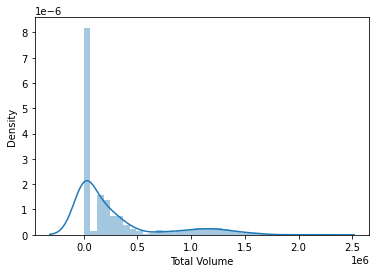

In [20]:
sns.distplot(df['Total Volume'])

In [21]:
scipy.stats.bartlett(df['Total Volume'], df['RegionsNum'])

BartlettResult(statistic=25236.742336926767, pvalue=0.0)

In [22]:
scipy.stats.fligner(df['Total Volume'], df['RegionsNum'])

FlignerResult(statistic=1280.3498904524556, pvalue=2.1061583618009585e-280)

In [23]:
postHoc = MultiComparison(df['Total Volume'], df['RegionsNum'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     0      1  84015.7173 0.0079  18186.7386 149844.6961   True
     0      2 489289.7073  0.001 423460.7286 555118.6861   True
     1      2   405273.99  0.001 339445.0112 471102.9687   True
---------------------------------------------------------------


# stats_model - heteroscedasticity corrected coefficient covariance matrix in the .anova_lm() 

# F-Oneway

In [24]:
stats.f_oneway(df.loc[df['RegionsNum']==0]["Total Volume"],
                   df.loc[df['RegionsNum']==1]["Total Volume"],
                    df.loc[df['RegionsNum']==2]["Total Volume"])

F_onewayResult(statistic=174.05378837225294, pvalue=1.101276256457687e-65)